<h1 align="center">A confetti game to enumerate microstates</h1>
<div align="right">David A. Miranda, PhD<br>2019</div>

# 1. Problem Statement

Let them be identical confetti tiles representing individual particles, one per confetti tile. Each particle can have associated with a specific energy that will correspond to a particular value within a discrete number of values ​​$\{E_1, E_2, ..., E_n, ..., E_N\}$. Note that $N$ is the number of energies accessible to the particles, no particle can have a different energy from that of the discrete values.

For a system made up of $M$ particles (one confetti for each one of them), with energy $E = En.sum()$, where each value $En = E_n$ represents the energy of the individual particle, the number of different possible configurations (microstates) of $M$ particles, such that the energy $E$ is the same, is known as the number of states and is represented by $\Omega(E)$.  However, in this simulation, we get the number of occurrences $\Omega'$, that is proportional to the number of states, i.e., $\Omega' = \gamma \Omega$.

Each particle is assumed to be indistinguishable from another particle; therefore, anyone can have a particular energy value $En$. For each energy value of the system $E = En.sum ()$, we have one or more microstates, characterized in that the sum of the energy of the particles equals the value $E$.

It is convenient to use the notation $(n_1, n_2, n_N)$ to enumerate a microstate, where $n_1$ is the number of particles with energy $E_1$ and thus for the other possible energies. For example, suppose that the energy values ​​that the five particles of a system can take are $\{1, 4, 9\}$ in $eV$, so a certain microstate could be $(1, 4, 0)$, another would be $(5, 0, 0)$. In the example, both microstates correspond to different energies, but each particle take the energy of $1 eV$. For this example, the number of states with energy $E = 5 eV$ will be $\Omega (5eV) = 2$ and will correspond to the microstates $(5, 0, 0)$ and $(4, 1, 0)$.

Since for each microstate we have a specific energy $E$, the notation can be simplified by leaving only the non-zero values, for example, instead of $(5, 0, 0)$ we would have $[5]$ and instead of $(4, 1, 0)$, we would have $[4, 1]$.  Note: here, the numbers in brackets "$[$ $]$" corresponds with a Python list.

# 2. Parameter definitions

In [1]:
numParticleEnergies = 5
numParticles = 10
numMicroStates = 10000
delta_E = 8 # Energy differential to define the interval between E and E + delta_E

# 3. To import libraries and define the microstate energy function

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n = np.arange(numParticleEnergies)
energies = 100.0 + (n+1)**2  # Energy in meV

def getNumOfMicrostates(particlesArray):
    """This method calculate the total energy of the microstate
       and get the enumeration identifier (n1, n2, ...)."""
    total_energy = particlesArray.sum()
    unique_elements, counts_elements = np.unique(particlesArray, return_counts=True)
    return pd.Series([total_energy, unique_elements, str(counts_elements)],
                      index = ['E','Particle Energy Values','State identifier'])

# 4. To get the microstates

In [3]:
print('Starting the statistical construction of assemblies ...')
assemblies = pd.DataFrame({'Particle energies':[np.random.choice(energies, size = numParticles) for i in range(numMicroStates)]})
print('\tFinished.')


Starting the statistical construction of assemblies ...
	Finished.


# 5. To get the energy for the microstates

In [4]:
print('Indexing the assemblies (this can take a while) ...')
E = assemblies.apply(lambda row:
    getNumOfMicrostates(row['Particle energies']),
    axis=1, result_type='expand')
print('\tFinished.')

Indexing the assemblies (this can take a while) ...
	Finished.


# 6. To group the microstates by energies between $E$ and $E + dE$

In [5]:
bins = np.arange(E['E'].min(), E['E'].max(), delta_E)
if bins[-1] != E['E'].max():
    bins = np.append(bins, E['E'].max())

def indexEnergies(row):
    """This method lets to obtain the energies bins for a microstate."""
    d = row.E - bins
    d[d < 0] = np.inf # It validate de energy be between E and E + dE
    return bins[np.argmin(d)]

E['bins'] = E.apply(indexEnergies, axis=1)

E_uniques = E['bins'].unique()
Omega = np.array([E.loc[E['bins'] == e]['State identifier'].unique().shape[0] for e in E_uniques])
k = np.argsort(E_uniques)
E_uniques = E_uniques[k]
Omega = Omega[k]

# 7. To plot the entropy $S' = k_B ln(\Omega'+1)$
Here we add one to the number of states $(\Omega'+1)$ to avoid the indetermination due to $ln(0)$.  Note the number of states $\Omega$ is proportional to the number of occurrences $\Omega'$, then, $\Omega' = \gamma \Omega$.

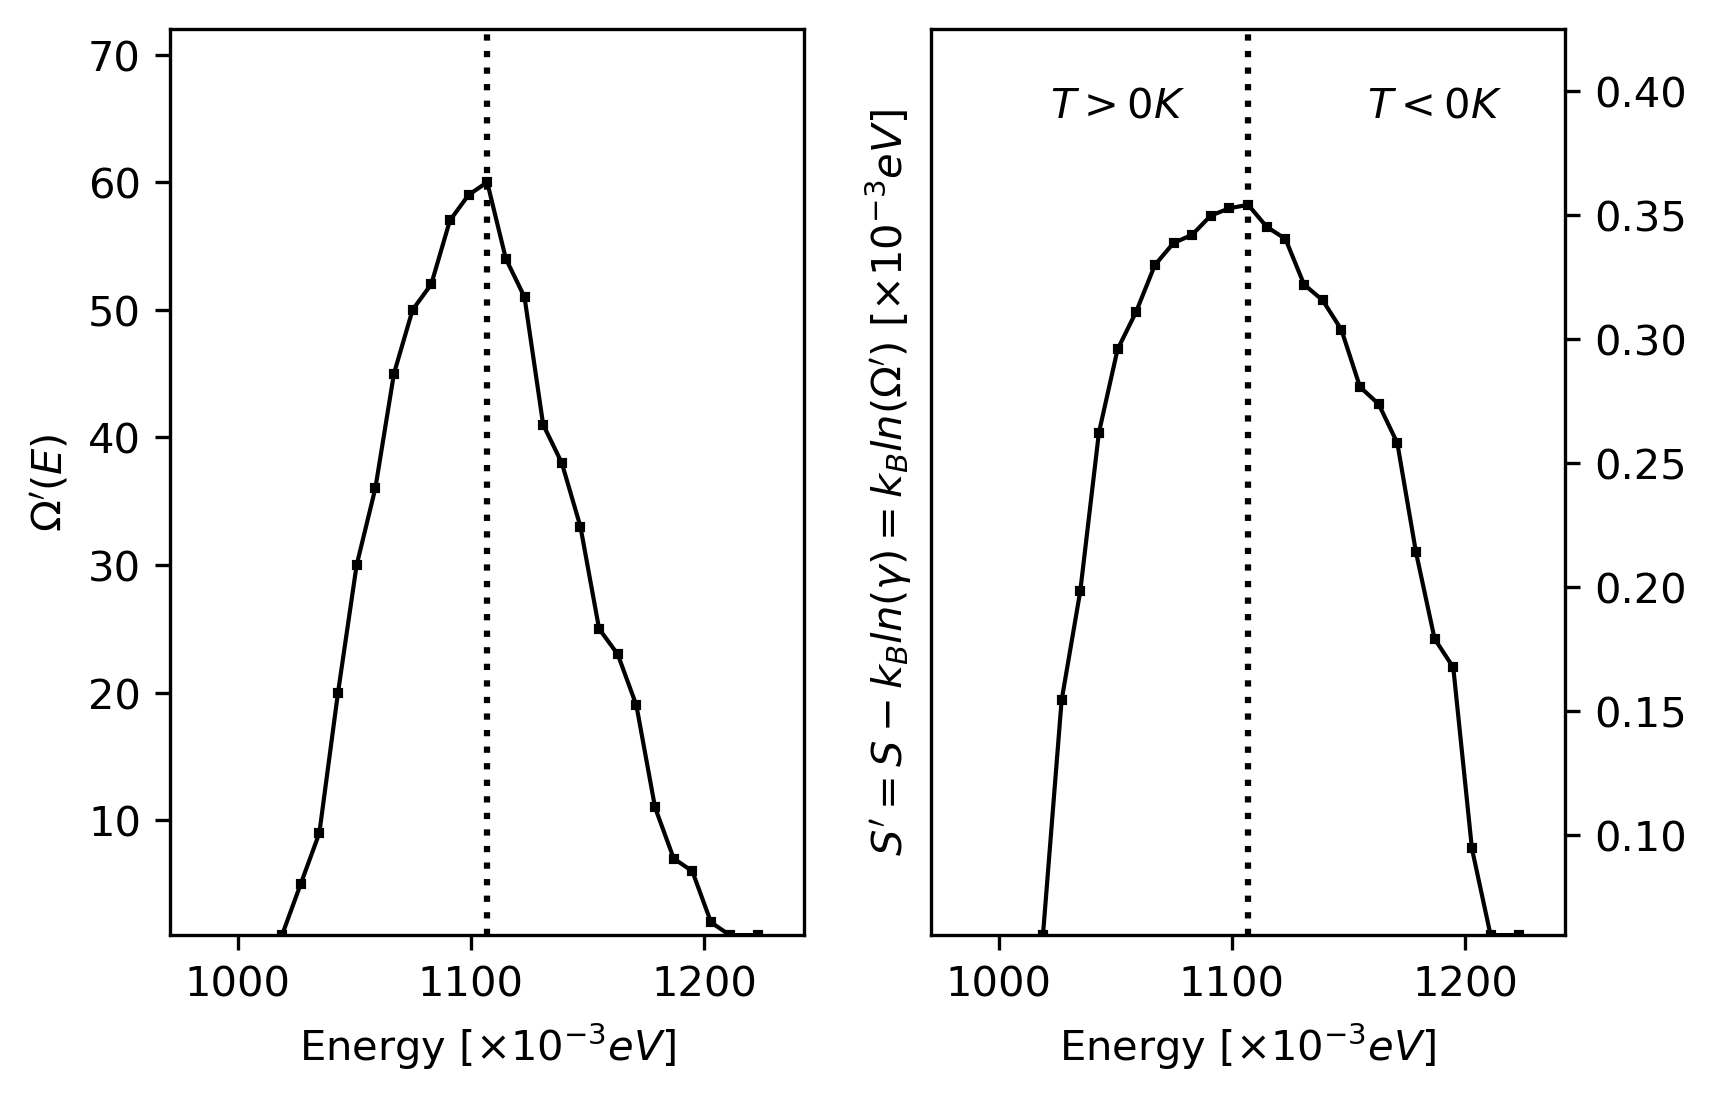

In [6]:
kB = 8.617333333e-2 # meV
S = kB*np.log(Omega+1)

Smax = S.max()
E_Smax = E_uniques[np.where(S == Smax)]
if type(E_Smax) == type(np.array([])):
    E_Smax = np.mean(E_Smax)
DE = 2*(max(E_uniques) - min(E_uniques))/3
E_Tpos = 3*DE/8 + E_Smax - DE
E_Tneg = E_Tpos + DE
S_mean = 1.1*Smax

plt.figure(dpi=300)
plt.subplot(1,2,1)
plt.plot(E_uniques, Omega, 'sk-', ms=1.5, lw=1)
plt.xlabel(r'Energy $[\times 10^{-3} eV]$')
plt.ylabel(r"$\Omega'(E)$")

plt.plot(2*[E_Smax], [min(Omega), 1.2*max(Omega)], 'k:')
plt.axis([E_Smax - DE, E_Smax + DE, min(Omega), 1.2*max(Omega)])

plt.subplot(1,2,2)
plt.plot(E_uniques, S,'sk-', ms=1.5, lw=1)
plt.xlabel(r'Energy $[\times 10^{-3} eV]$')
plt.ylabel(r"$S' = S - k_Bln(\gamma) = k_Bln(\Omega')$ $[\times 10^{-3} eV]$")
ax = plt.gca()
ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")

plt.plot(2*[E_Smax], [min(S), 1.2*Smax], 'k:')
plt.axis([E_Smax - DE, E_Smax + DE, min(S), 1.2*Smax])
plt.text(E_Tpos, S_mean, r'$T > 0K$')
plt.text(E_Tneg, S_mean, r'$T < 0K$')

plt.savefig('simulated_omega_and_entropy.png', dpi=300)

plt.show()

End!